In [1]:
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from __future__ import division
from IPython.core.debugger import set_trace

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
shoppings = pd.read_csv('./data/supermarket_data.csv')

#### convert SHOP_DATE to DateTime

In [3]:
shoppings['SHOP_DATE'] = shoppings['SHOP_DATE'].apply(str)
shoppings['SHOP_DATE'] = pd.to_datetime(shoppings['SHOP_DATE'], format='%Y%m%d')

In [4]:
shoppings.shape

(671914, 8)

In [5]:
shoppings.head()

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND
0,2007-10-06,21,994107800268406,CUST0000153531,STORE00001,PRD0901391,1,0.37
1,2007-02-01,15,994104300305853,CUST0000219191,STORE00002,PRD0901915,1,5.08
2,2007-11-03,13,994108200514137,CUST0000526979,STORE00003,PRD0903379,1,2.36
3,2007-02-06,18,994104400743650,CUST0000913709,STORE00004,PRD0903305,1,0.20
4,2007-10-15,19,994108000780959,CUST0000961285,STORE00001,PRD0903387,1,1.65


In [6]:
shoppings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671914 entries, 0 to 671913
Data columns (total 8 columns):
SHOP_DATE     671914 non-null datetime64[ns]
SHOP_HOUR     671914 non-null int64
BASKET_ID     671914 non-null int64
CUST_CODE     671914 non-null object
STORE_CODE    671914 non-null object
PROD_CODE     671914 non-null object
QUANTITY      671914 non-null int64
SPEND         671914 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 41.0+ MB


#### There are no missing values. GOOD!!

In [7]:
shoppings.describe()

,SHOP_HOUR,BASKET_ID,QUANTITY,SPEND
count,671914.000000,6.719140e+05,671914.000000,671914.000000
mean,14.745869,9.941078e+14,1.514344,1.852796
std,3.551738,2.286042e+09,1.668037,2.589564
min,8.000000,9.941039e+14,1.000000,0.010000
25%,12.000000,9.941058e+14,1.000000,0.750000
50%,15.000000,9.941077e+14,1.000000,1.210000
75%,17.000000,9.941098e+14,1.000000,2.040000
max,21.000000,9.941117e+14,73.000000,189.630000


## SHOP_HOUR

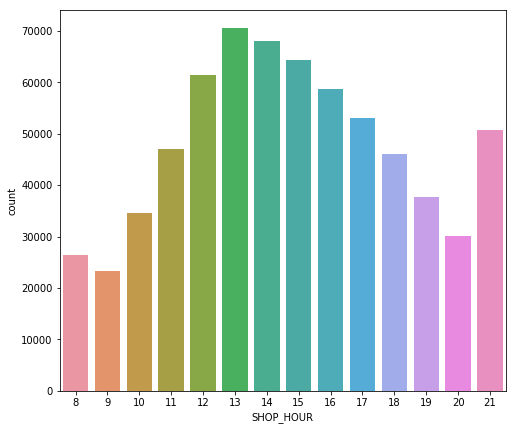

In [8]:
plt.figure(figsize=(8, 7))
sns.countplot(shoppings['SHOP_HOUR'])
plt.show()

#### The most shoppings occur  during 12.00 - 15.00
#### And peeks again at 20.00 - 21.00, maybe people go pickup some grocery before they come back home

## The biggest baskets

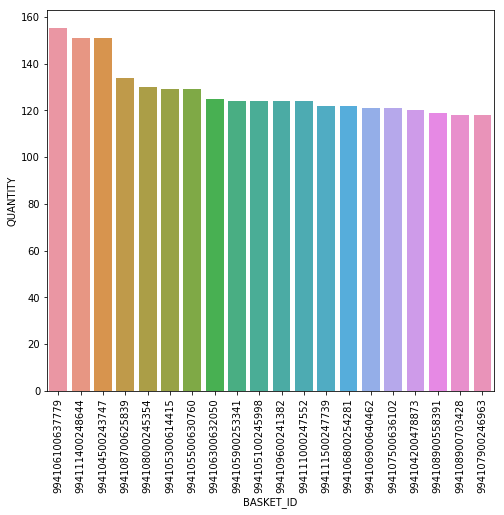

In [9]:
grouped_by_basket = shoppings.groupby('BASKET_ID', as_index=False)
biggest_baskets = grouped_by_basket['QUANTITY'].sum().sort_values('QUANTITY', ascending=False)[:20]

plt.figure(figsize=(8, 7))
sns.barplot(data=biggest_baskets, x='BASKET_ID', y='QUANTITY', order=biggest_baskets['BASKET_ID'])
plt.xticks(rotation=90)

plt.show()

### Mean  item counts per basket

In [10]:
total_quantity_per_baskey = grouped_by_basket['QUANTITY'].sum()
total_quantity_per_baskey['QUANTITY'].mean()

10.565594367835189

#### On average customers purchased 10.56 items each time

### Mean spend per basket

In [11]:
total_spend_per_basket = grouped_by_basket['SPEND'].sum()
total_spend_per_basket['SPEND'].mean()

12.926974684333183

#### On average customers spend 12.92 dollars each time

### Which products are purchased the most often?

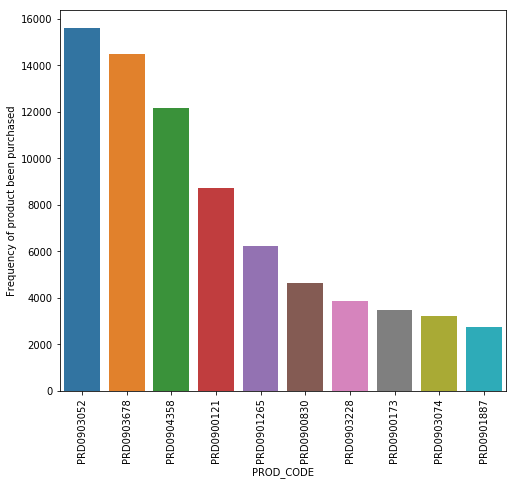

In [12]:
groupby_by_product = shoppings.groupby('PROD_CODE', as_index=False)['BASKET_ID'].count()
most_purchased_products = groupby_by_product.sort_values('BASKET_ID', ascending=False)[:10]

plt.figure(figsize=(8, 7))
sns.barplot(data=most_purchased_products, x='PROD_CODE', y='BASKET_ID', order=most_purchased_products['PROD_CODE'])
plt.xticks(rotation=90)
plt.ylabel('Frequency of product been purchased')
plt.show()

### QUANTITY distribution

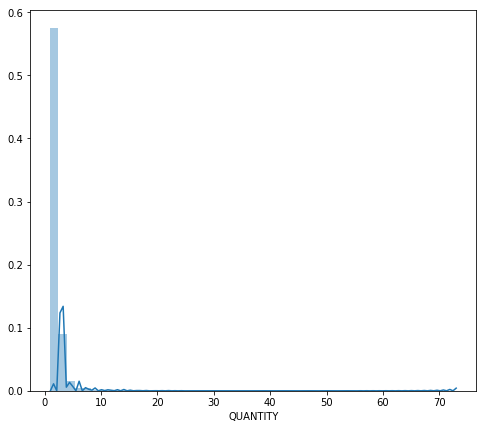

In [13]:
plt.figure(figsize=(8, 7))
sns.distplot(shoppings['QUANTITY'])
plt.show()

### SPEND distribution

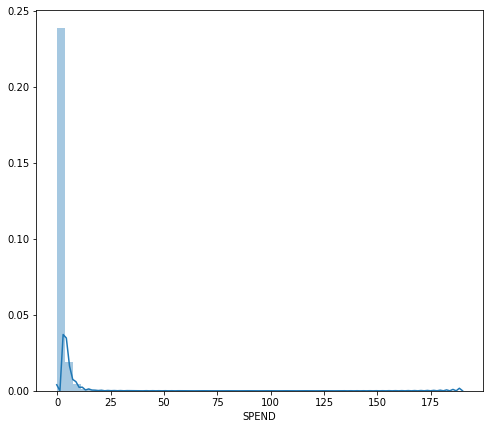

In [14]:
plt.figure(figsize=(8, 7))
sns.distplot(shoppings['SPEND'])
plt.show()

### The Big Spender

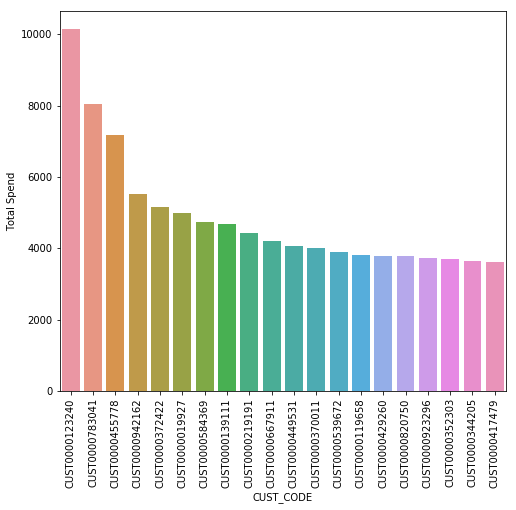

In [15]:
grouped_by_customer = shoppings.groupby('CUST_CODE', as_index=False)
big_spenders = grouped_by_customer['SPEND'].sum().sort_values('SPEND',ascending=False)[:20]

plt.figure(figsize=(8, 7))
sns.barplot(data=big_spenders, x='CUST_CODE', y='SPEND', order=big_spenders['CUST_CODE'])
plt.xticks(rotation=90)
plt.ylabel('Total Spend')
plt.show()

### The Loyal Supporters (most frequency buy)

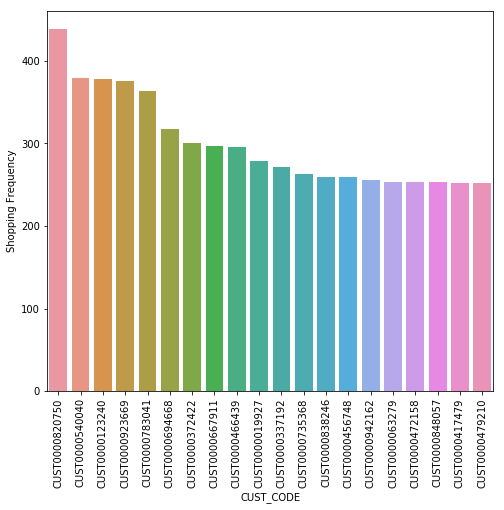

In [16]:
top_loyal = grouped_by_customer['BASKET_ID'].agg(lambda x: len(x.unique())).sort_values('BASKET_ID', ascending=False)[:20]

plt.figure(figsize=(8, 7))
sns.barplot(data=top_loyal, x='CUST_CODE', y='BASKET_ID', order=top_loyal['CUST_CODE'])
plt.xticks(rotation=90)
plt.ylabel('Shopping Frequency')
plt.show()


### Customers who come during 19:00 - 21:00 most likely to come the same time

In [17]:
customers_at_night = shoppings.loc[(shoppings['SHOP_HOUR'] == 20) | (shoppings['SHOP_HOUR'] == 21), 'CUST_CODE'].unique()
customers_at_day = shoppings.loc[(shoppings['SHOP_HOUR'] != 20), 'CUST_CODE'].unique()
count = 0
for customer in customers_at_night:
    if(customer not in customers_at_day):
        count = count + 1
   
print(f"There are {count} customers who only come between 19:00-21:00")


There are 90 customers who only come between 19:00-21:00


## RMF Model

In [18]:
NOW = shoppings['SHOP_DATE'].max()

In [19]:
m_table = shoppings.groupby(['CUST_CODE','BASKET_ID'], as_index=False)['SPEND'].mean().drop(columns=['BASKET_ID']).groupby('CUST_CODE', as_index=False)['SPEND'].sum()
m_table = m_table.rename(columns={
    'SPEND' : 'monetary'
})

In [20]:
rf_table = shoppings.groupby(['CUST_CODE'], as_index=False).agg({
    'BASKET_ID': lambda x: len(x.unique()),
    'SHOP_DATE': lambda x: (NOW - x.max()).days
}).rename(columns={
    'BASKET_ID' : 'frequency',
    'SHOP_DATE' : 'recency'
})

In [21]:
rmf_table = pd.merge(left=m_table, right=rf_table, on='CUST_CODE')

### Recency distribution

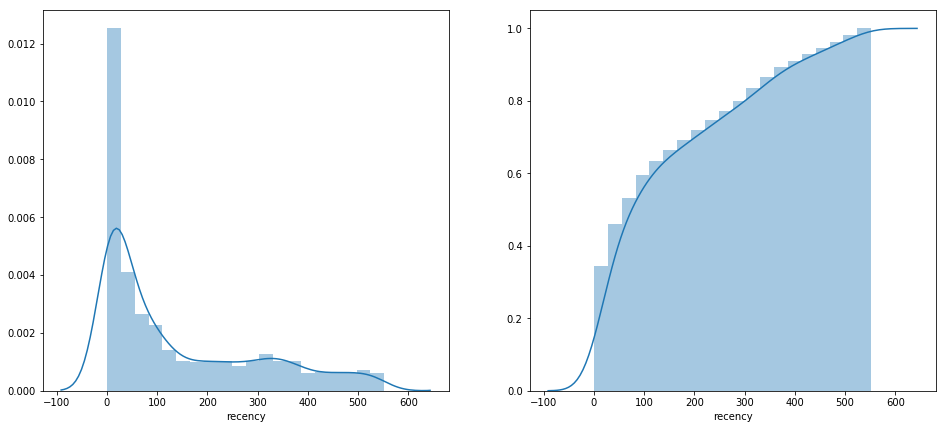

In [22]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.distplot(rmf_table['recency'])
plt.subplot(122)
sns.distplot(rmf_table['recency'], 
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
plt.show()

#### Most customers are active

### Monetary distribution

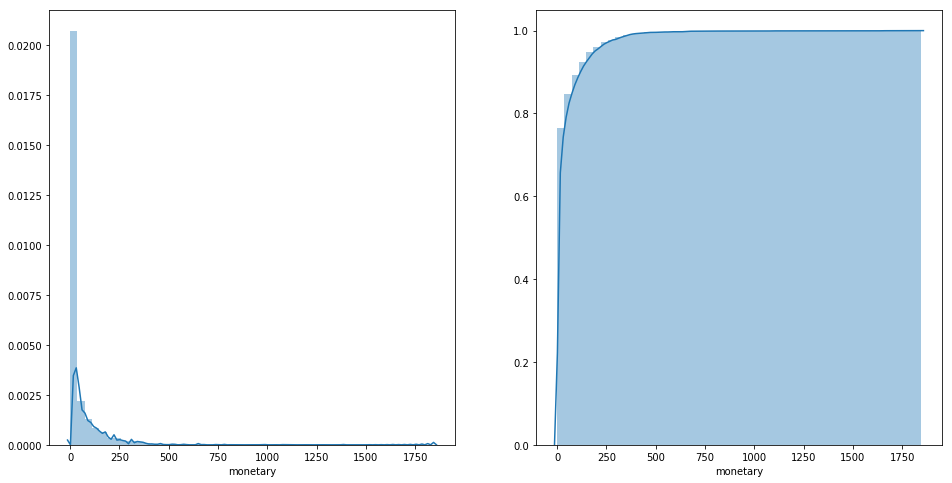

In [23]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.distplot(rmf_table['monetary'])
plt.subplot(122)
sns.distplot(rmf_table['monetary'], 
            hist_kws=dict(cumulative=True),
            kde_kws=dict(cumulative=True))
plt.show()

### Frequancy distribution

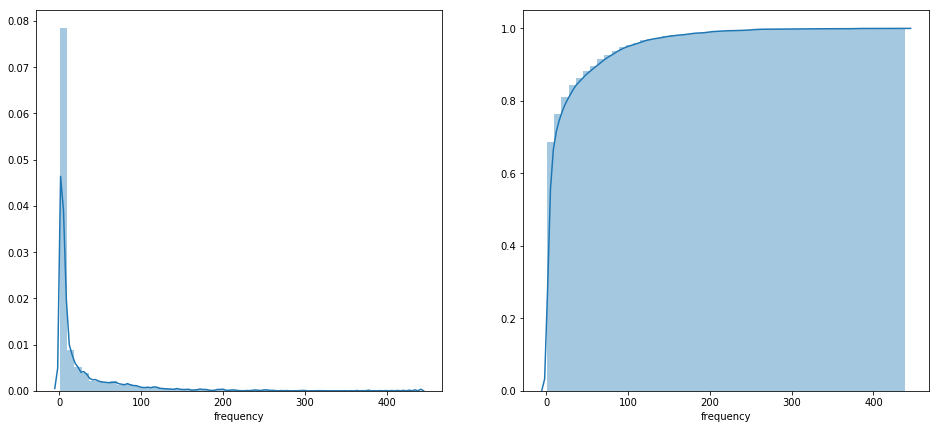

In [24]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.distplot(rmf_table['frequency'])
plt.subplot(122)
sns.distplot(rmf_table['frequency'], 
            hist_kws=dict(cumulative=True),
            kde_kws=dict(cumulative=True))
plt.show()

### Recency vs. Frequency  

<Figure size 720x720 with 0 Axes>

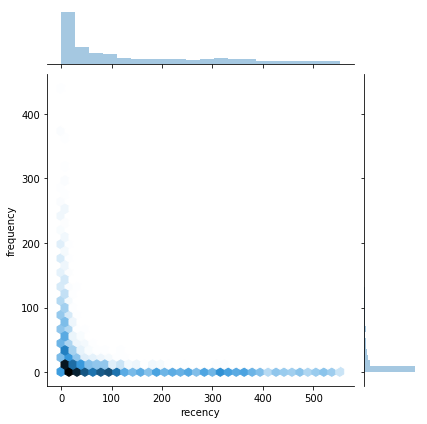

In [25]:
plt.figure(figsize=(10, 10))
sns.jointplot(x=rmf_table['recency'], y=rmf_table['frequency'], kind='hex')
plt.show()

#### Most customers are  one-time customers

### Recency vs. Frequency vs. Monetary

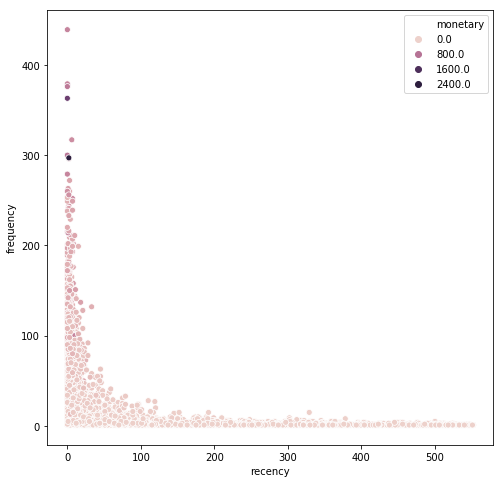

In [26]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=rmf_table['recency'], y=rmf_table['frequency'], hue=rmf_table['monetary'])
plt.show()

### Kmean clustering based on RMF 

In [27]:
from sklearn.cluster import KMeans
def elbow_plot(data):
    sse = {}
    for k in range(1, 21):
        kmeans = KMeans(n_clusters = k).fit(data)
        sse[k] = kmeans.inertia_ 
    
    plt.figure(figsize=(8, 5))
    plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
    plt.xlabel("Number of K")
    plt.xticks(np.arange(k) +1)
    plt.ylabel("SSE")

#### Elbow plot without rescaling data

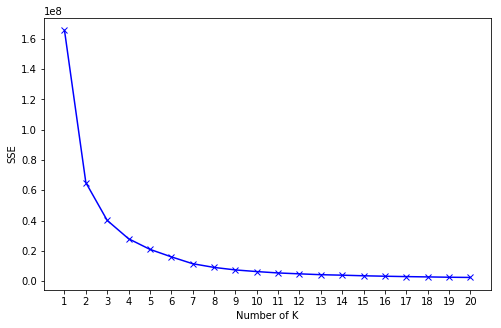

In [28]:
elbow_plot(rmf_table.drop(columns=['CUST_CODE']))

#### Elbow plot with rescaling data

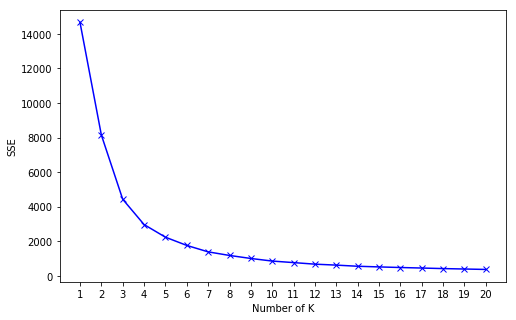

In [29]:
rmf_table_scaled = rmf_table.drop(columns=['CUST_CODE'])
rmf_table_scaled = (rmf_table_scaled - rmf_table_scaled.mean()) / rmf_table_scaled.std()
elbow_plot(rmf_table_scaled)

In [30]:
kmeans = KMeans(n_clusters=4).fit(rmf_table_scaled)
rmf_table['cluster'] = kmeans.labels_
rmf_table.groupby('cluster', as_index=False).mean()

,cluster,monetary,frequency,recency
0,0,16.883789,8.861192,63.181686
1,1,146.192788,76.937394,7.121827
2,2,2.789966,1.484211,361.707368
3,3,409.535882,197.829268,2.959350


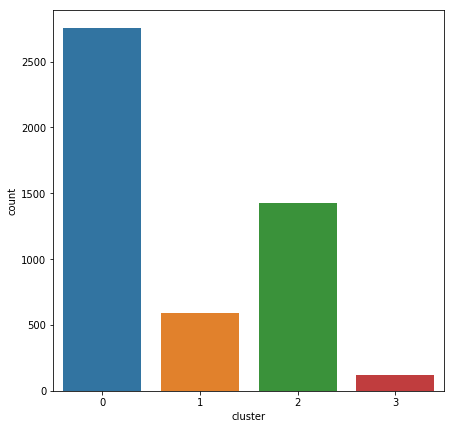

In [31]:
plt.figure(figsize=(7, 7))
sns.countplot(rmf_table['cluster'])
plt.show()

### New behavior index

In [32]:
shoppings['SHOP_DATE_TIME'] = shoppings['SHOP_DATE'] + pd.to_timedelta(shoppings.SHOP_HOUR, unit='h')

grouped_customers = shoppings.groupby(['CUST_CODE','BASKET_ID'], as_index=False)

spend_means = grouped_customers['SPEND'].mean().drop(columns=['BASKET_ID']).groupby('CUST_CODE', as_index=False)['SPEND'].sum()
spend_means.rename(columns= {
    'SPEND' : 'spend_means'
}, inplace=True)

frequency_mean = grouped_customers['SHOP_DATE_TIME'].agg(lambda x: x.max())
def dates_diff_mean(dates):
    if(len(dates) == 1):
        return 0
    else:
        dates = dates.sort_values()
        diff = (dates - dates.shift(periods=1))[1:].mean()
        #result = (diff.days * 24) + (diff.seconds / 3600)
        return diff

frequency_mean = grouped_customers['SHOP_DATE_TIME'].agg(lambda x: x.iloc[0]).groupby('CUST_CODE', as_index=False)['SHOP_DATE_TIME'].agg(dates_diff_mean)
frequency_mean['SHOP_DATE_TIME'] = frequency_mean['SHOP_DATE_TIME'].apply(lambda x: 0 if (x == 0) else (x.days * 24) + (x.seconds / 3600))
frequency_mean.rename(columns={
    'SHOP_DATE_TIME' : 'hours_diff_shop'
}, inplace=True)
frequency_mean['days_diff_shop'] = frequency_mean['hours_diff_shop'] / 24


quantity_mean = grouped_customers['QUANTITY'].sum().groupby('CUST_CODE', as_index=False)['QUANTITY'].mean()
quantity_mean.rename(columns={
    'QUANTITY' : 'quantity_mean'
}, inplace=True)

In [33]:
from functools import reduce
customers = reduce((lambda df1, df2: pd.merge(df1, df2, on='CUST_CODE')),[spend_means, frequency_mean, quantity_mean])

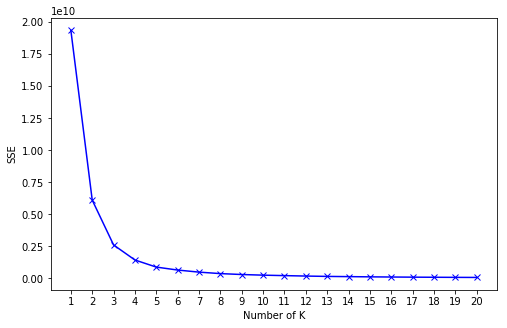

In [34]:
elbow_plot(customers.drop(columns=['CUST_CODE']))

### Rescale 

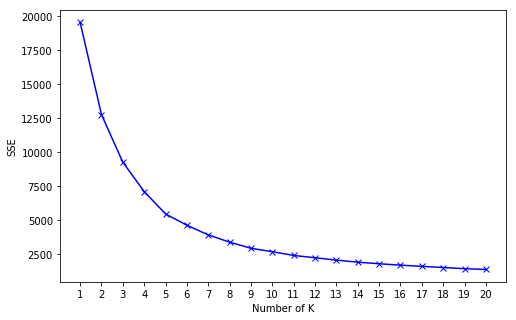

In [35]:
customers_scaled = customers.drop(columns=['CUST_CODE'])
customers_scaled = (customers_scaled- customers_scaled.mean()) / customers_scaled.std()
elbow_plot(customers_scaled)

### Train K-mean with K = 5

In [36]:
kmeans = KMeans(n_clusters=5).fit(customers_scaled)
customers['cluster'] = kmeans.labels_
customers.groupby('cluster', as_index=False).mean().drop(columns=['hours_diff_shop'])

,cluster,spend_means,days_diff_shop,quantity_mean
0,0,7.059289,130.144526,5.321217
1,1,45.223203,26.410239,22.591866
2,2,20.096485,15.539890,4.710568
3,3,5.006812,349.485689,6.890966
4,4,288.071767,4.841843,10.187490


##  customer types  distributetion

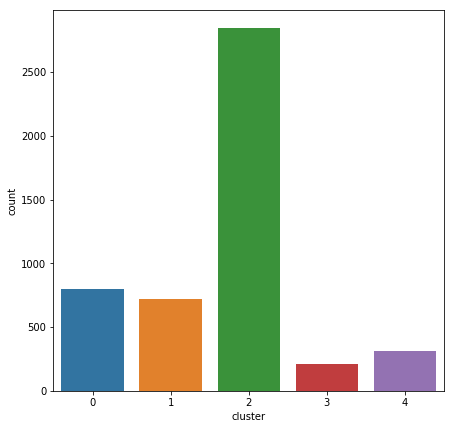

In [37]:
plt.figure(figsize=(7, 7))
sns.countplot(customers['cluster'])
plt.show()

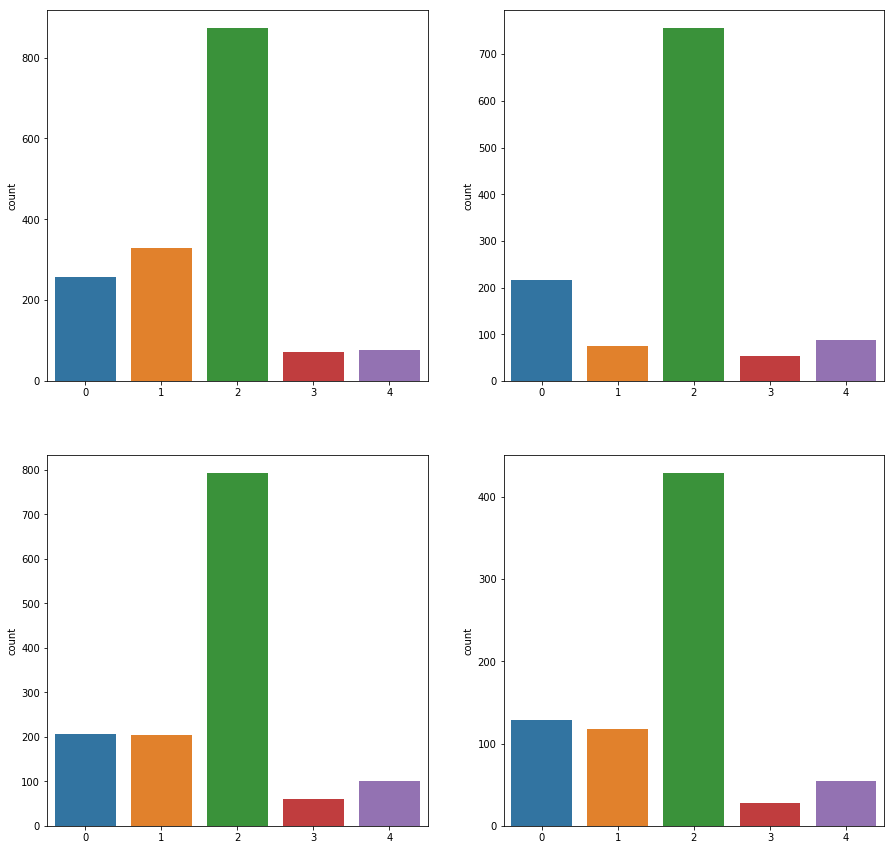

In [38]:
from collections import defaultdict

def get_cluster(customer_code):
    return customers.loc[customers['CUST_CODE'] == customer_code, 'cluster'].values[0]

plt.figure(figsize=(15, 15))
customer_types_by_stores = defaultdict(list)
for index, store_code in enumerate(shoppings['STORE_CODE'].unique()):
    customers_of_store = shoppings.loc[shoppings['STORE_CODE'] == store_code, 'CUST_CODE'].unique()
    customer_types_by_stores[store_code] = [get_cluster(cust_code) for cust_code in customers_of_store]
    
    plt.subplot(2,2, index+1)
    sns.countplot(customer_types_by_stores[store_code])
    
plt.show()  

### Which pair of products are most buy together

In [39]:
import itertools 

def combinations(ts, p=2):
    c = list(itertools.combinations(ts, p))
    unq = set(c)
    return unq

In [40]:
products_combinations = combinations(shoppings['PROD_CODE'].unique())
count_table = pd.DataFrame({
    'first' : [item[0] for item in products_combinations],
    'second' : [item[1] for item in products_combinations],
    'count' : np.zeros(len(products_combinations))
})

In [41]:
#for bastket, group in shoppings.groupby('BASKET_ID'):
#    product_pairs = combinations(group['PROD_CODE'])
#    for pairs in product_pairs:
#        bools = ((count_table['first'] == pairs[0]) & (count_table['second'] == pairs[1])) | ((count_table['first'] == pairs[1]) & (count_table['second'] == pairs[0]))
#        count_table.loc[bools, 'count'] = count_table.loc[bools, 'count'] + 1

In [42]:
#count_table.sort_values('count', ascending=False).head()

## Questions
behavior of customers<br>
which pair of products are most buy together + แยกตามร้าน<br>
Is customers sensetive in changing of unit price<br>
price zone<br>
ช่วงเวลาที่ขายได้ดีของสินค่าต่างๆ <br>
สินค้าขายดีแต่ละร้าน<br>
เวลาไหนขายดี<br>

In [43]:
def get_key(key1, key2, D):
    key =  [key for key, value in D.items() if ((key[0] == key1) & (key[1] == key2) | (key[0] == key2) & (key[1] == key1))]
    if(len(key) == 1):
        return key[0] 
    else:
        return None

count_dict = {}

more_than_1_item_baskets = shoppings.groupby('BASKET_ID').filter(lambda x: len(x['PROD_CODE']) > 1)

#for bastket, group in more_than_1_item_baskets.groupby('BASKET_ID'):
#    product_pairs = combinations(group['PROD_CODE'])
#    for pair in product_pairs:
#        key_in_dict = get_key(pair[0], pair[1], count_dict)
#        if(key_in_dict is None):
#            count_dict[(pair[0], pair[1])] = 1
#        else:
#            count_dict[key_in_dict] =  count_dict[key_in_dict] + 1


In [44]:
count_dict

{}